# Draft

In [1]:
import requests
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
%matplotlib inline

In [2]:
# url = 'https://e4ftl01.cr.usgs.gov/VIIRS/VNP09GA.001/2018.10.09/VNP09GA.A2018282.h33v09.001.2018284140039.h5'
filename = 'VNP09GA.A2018280.h13v11.001.2018281193617.h5'
outbase = filename.rsplit('.', maxsplit=1)[0]

In [3]:
file_data = h5py.File(filename)

In [4]:
fields = []
file_data.visit(fields.append)
fields = [f for f in fields if '/SurfReflect' in f]
fields = {f.rsplit('/', maxsplit=1)[1]: file_data[f] for f in fields}
fields

{'SurfReflect_M10_1': <HDF5 dataset "SurfReflect_M10_1": shape (1200, 1200), type "<i2">,
 'SurfReflect_M11_1': <HDF5 dataset "SurfReflect_M11_1": shape (1200, 1200), type "<i2">,
 'SurfReflect_M1_1': <HDF5 dataset "SurfReflect_M1_1": shape (1200, 1200), type "<i2">,
 'SurfReflect_M2_1': <HDF5 dataset "SurfReflect_M2_1": shape (1200, 1200), type "<i2">,
 'SurfReflect_M3_1': <HDF5 dataset "SurfReflect_M3_1": shape (1200, 1200), type "<i2">,
 'SurfReflect_M4_1': <HDF5 dataset "SurfReflect_M4_1": shape (1200, 1200), type "<i2">,
 'SurfReflect_M5_1': <HDF5 dataset "SurfReflect_M5_1": shape (1200, 1200), type "<i2">,
 'SurfReflect_M7_1': <HDF5 dataset "SurfReflect_M7_1": shape (1200, 1200), type "<i2">,
 'SurfReflect_M8_1': <HDF5 dataset "SurfReflect_M8_1": shape (1200, 1200), type "<i2">,
 'SurfReflect_QF1_1': <HDF5 dataset "SurfReflect_QF1_1": shape (1200, 1200), type "|u1">,
 'SurfReflect_QF2_1': <HDF5 dataset "SurfReflect_QF2_1": shape (1200, 1200), type "|u1">,
 'SurfReflect_QF3_1': <H

In [5]:
meta_data = file_data['HDFEOS INFORMATION/StructMetadata.0'].value.split()
meta_data = [m.decode('utf-8') for m in meta_data]

In [6]:
red = fields['SurfReflect_M5_1']
green = fields['SurfReflect_M4_1']
blue = fields['SurfReflect_M3_1']
nir = fields['SurfReflect_M7_1']

In [7]:
list(red.attrs)

['long_name',
 'units',
 'valid_range',
 '_FillValue',
 'Offset',
 'Scale',
 'FILL_VALUES']

In [8]:
fill_value, scale_factor = red.attrs['_FillValue'][0], red.attrs['Scale'][0]

In [9]:
red_s = red.value * scale_factor
green_s = green.value * scale_factor
blue_s = blue.value * scale_factor
nir_s = nir.value * scale_factor

In [10]:
rgb = np.dstack((red_s, green_s, blue_s))
rgb[rgb == fill_value * scale_factor] = 0

In [11]:
p2, p98 = np.percentile(rgb, (2, 98))
rgb_stretched = exposure.rescale_intensity(rgb, in_range=(p2, p98))
rgb_stretched = exposure.adjust_gamma(rgb_stretched, 0.5)

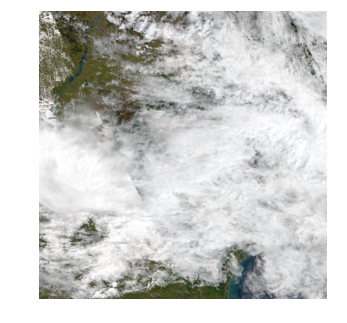

In [12]:
fig = plt.figure()
ax = plt.Axes(fig,[0,0,1,1])
ax.set_axis_off()
fig.add_axes(ax)
ax.imshow(rgb_stretched, interpolation='bilinear', alpha=0.9);